# Introduction
oneargopy is a library designed to ease the access to Argo float data. This notebook is meant to briefly explain and give examples of some of the functionality of oneargopy.

# Setup


In [1]:
pip install oneargopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 32.4 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 33.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 31.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 32.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 33.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.8/22.8 MB 37.1 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 35.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20/20 [oneargopy]20 [oneargopy]]
Note: you may need to restart the kernel to use updated packages.


In [1]:
from oneargopy.OneArgo import Argo

Matplotlib is building the font cache; this may take a moment.


# Constructor
  





The Argo constructor downloads the index files from either one of the Argo Global Data Assembly Centers (GDAC) and stores them in the proper directories defined in the DownloadSettings class. It then constructs the dataframes from the argo_synthetic-profile_index.txt file and the ar_index_global_prof.txt file for use in class function calls. Two of the dataframes are a reflection of the index files, the third dataframe is a two column frame with float ids and if they are a bgc float or not.

There are two different ways to call the Argo class constructor, with or without an argument (the path to the configuration json file).

Argo has a few settings classes that it uses internally to determine the location of files and the hosts to pull data from. You can either call the constructor with default settings or call the constructor with a passed user configuration file.

## User Configuration: Load settings from a json file

The standard way to initalize OneArgoPy is to pass a path to a json configuration file to the constructor. An example of the configuration json file can be found in the [oneargopy Github repository](https://github.com/NOAA-PMEL/OneArgoPy/blob/main/argo_config.json).

The settings can be adjusted to the user's preference using this configuration file. This must be done before calling the Argo constructor.
The file name used here refers to the sample json file that is part of the github repository.

For use in google colab the base_dir should be something like "/content/folder" because 'content' is the name of the base folder in the files section of google colab.

*NOTE*: When you call the constructor without arguments, OneArgoPy uses default values for these settings and the folders needed to store the Argo data files will be created in the same directory that the Argo class is in. If you used the standard installation with pip, this will be in the Python repository path, which is probably not ideal.

In [2]:
# Call constructor and initialize the library. 
# This includes downloading the latest versions of the index files if necessary.
argo = Argo('argo_config.json')

Starting initialize process...
Your current download settings are: 
[DownloadSettings] -> 
Base Directory: ., 
Subdirectories: ['Index', 'Meta', 'Tech', 'Traj', 'Profiles'], 
Index Files: ['ar_index_global_traj.txt', 'ar_index_global_tech.txt', 'ar_index_global_meta.txt', 'ar_index_global_prof.txt', 'argo_synthetic-profile_index.txt'], 
Verbose Setting: True, 
Max Attempts: 5, 
Keep Index In Memory: True, 
Float Type: bgc

Your current source settings are: 
[Source Settings] -> 
Hosts: ['https://data-argo.ifremer.fr/', 'https://usgodae.org/ftp/outgoing/argo/'], 
Available Variables: None, 
Data Assimilation Centers: None

Checking for subdirectories...
Creating the Index directory
Creating the Meta directory
Creating the Tech directory
Creating the Traj directory
Creating the Profiles directory

ar_index_global_traj.txt needs to be downloaded.
Unzipping ar_index_global_traj.txt.gz...
Success!
ar_index_global_tech.txt needs to be downloaded.
Unzipping ar_index_global_tech.txt.gz...
Succ

# Functions

oneargopy currently has four public functions to help scientists access and analyze Argo float data.

## select_profiles()

select_profiles is a public function of the Argo class that returns a dictionary of float IDs (keys) and profile lists (values) that match the passed criteria.

The profiles can be selected based on geographic limits, date limits, specific float IDs, ocean basin, and float type ('bgc' for biogeochemical floats, 'phys' for floats without biogeochemical sensors, or 'all' for all floats, which is the default).

They can be further modified based on an 'outside' parameter which by default is None but can be set to 'time' or 'space' or 'both': By default, only float profiles that are within both the temporal and spatial constraints are returned (None); specify 'time' to also maintain profiles outside of the temporal constraints, 'space' to maintain profiles outside of spatial constraints, or 'both' to keep both, i.e., all profiles of all floats that have at least one profile that matches both temporal and spatial constraints simultaneously.

The longitude and latitude limits can be entered as either two-element lists, in which case the limits will be interpreted as maximum and minimum limits that form a rectangle, or they can be entered as longer lists (of matching lengths) in which case each pair of longitude and latitude values correspond to a vertex of a polygon. The longitude and latitude limits can be input in any 360 degree range that encloses all the desired longitude values, e.g., lon_lim=[20, 370] will include all profiles between 20E and 360E as well as 0 to 10E.
In the two-element format, it is possible to enter only longitudes or latitudes. For instance, specify lat_lim=[-90, -60] to restrict your search to the Southern Ocean.

## Example 1: Biogeochemical floats along the US West Coast
This example is selecting biogeochemical floats along the US West coast with profiles from 2021 until now.

In [3]:
profiles_uswc = argo.select_profiles(lon_lim=[-127,-115], lat_lim=[32.5,48.5], 
                                     start_date='2021-01-01', type='bgc')

Starting select_profiles...
Validating parameters...
Validating longitude and latitude limits...
Validating start and end dates...
Validating 'type' keyword argument...
Preparing float data for filtering...


/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:769: UserWarning: no explicit representation of timezones available for np.datetime64
  self.start_date = np.datetime64(self.start_date)
/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:770: UserWarning: no explicit representation of timezones available for np.datetime64
  self.end_date = np.datetime64(self.end_date)


Filtering through 19891 floats
There are 3252238 profiles associated with these floats

Sorting floats for those within the geographic range...
Creating point list from profiles...
Creating polygon...
35 floats fall within the geographic range
2185 profiles associated with those floats
Sorting floats for those within the date range...
1620 floats fall within the date range
147789 profiles associated with those floats
Applying outside=None constraints...
29 floats selected
1825 profiles selected according to time and space constraints
Floats Selected: dict_keys([2903886, 4902551, 4902624, 4902663, 4903026, 4903499, 4903500, 4903828, 5906293, 5906294, 5906295, 5906296, 5906297, 5906441, 5906445, 5906446, 5906507, 5906517, 5906880, 5906881, 5906882, 5906883, 5906884, 5906885, 5907153, 6990662, 6990690, 7902198, 7902199])



/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:1074: UserWarning: no explicit representation of timezones available for np.datetime64
  beginning_of_full_range = np.datetime64(datetime(1995, 1, 1, tzinfo=timezone.utc))
/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:1075: UserWarning: no explicit representation of timezones available for np.datetime64
  end_of_full_range = np.datetime64(datetime.now(timezone.utc))


## Example 2: All profiles of a specified float
If no geographic or date range are given, OneArgoPy will select all floats and profiles that match the other criteria. If no criteria are specified at all ("select_profiles()"), all floats and profiles will be returned.

You can also specify one float by its WMO ID as shown here, or multiple floats with a list, e.g: floats=[5906441, 5906446, 5906507]. Without specifying further criteria, all of its profiles will be returned.

Here we select the profiles for a float off the coast of Hawaii.

In [5]:
profiles_hawaii = argo.select_profiles(floats=5903611)
profiles_hawaii

Starting select_profiles...
Validating parameters...
Validating longitude and latitude limits...
Validating start and end dates...
Validating 'type' keyword argument...
Preparing float data for filtering...
Validating passed floats...
Filtering through 1 floats
There are 426 profiles associated with these floats

Applying outside=None constraints...
1 floats selected
426 profiles selected according to time and space constraints
Floats Selected: dict_keys([5903611])



/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:769: UserWarning: no explicit representation of timezones available for np.datetime64
  self.start_date = np.datetime64(self.start_date)
/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:770: UserWarning: no explicit representation of timezones available for np.datetime64
  self.end_date = np.datetime64(self.end_date)
/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:1074: UserWarning: no explicit representation of timezones available for np.datetime64
  beginning_of_full_range = np.datetime64(datetime(1995, 1, 1, tzinfo=timezone.utc))
/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:1075: UserWarning: no explicit representation of timezones available for np.datetime64
  end_of_full_range = np.datetime64(datetime.now(timezone.utc))


{5903611: [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,


## trajectories()

This function plots the trajectories of one or more specified float(s).

Floats can be passed as a singular ID (int), a list of IDs, or a dictonary returned from the select_profiles function, in which case only the passed profiles will be plotted.

In this example we use the trajectories function to plot the profiles we selected along the US West coast.

Validating passed floats...


/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


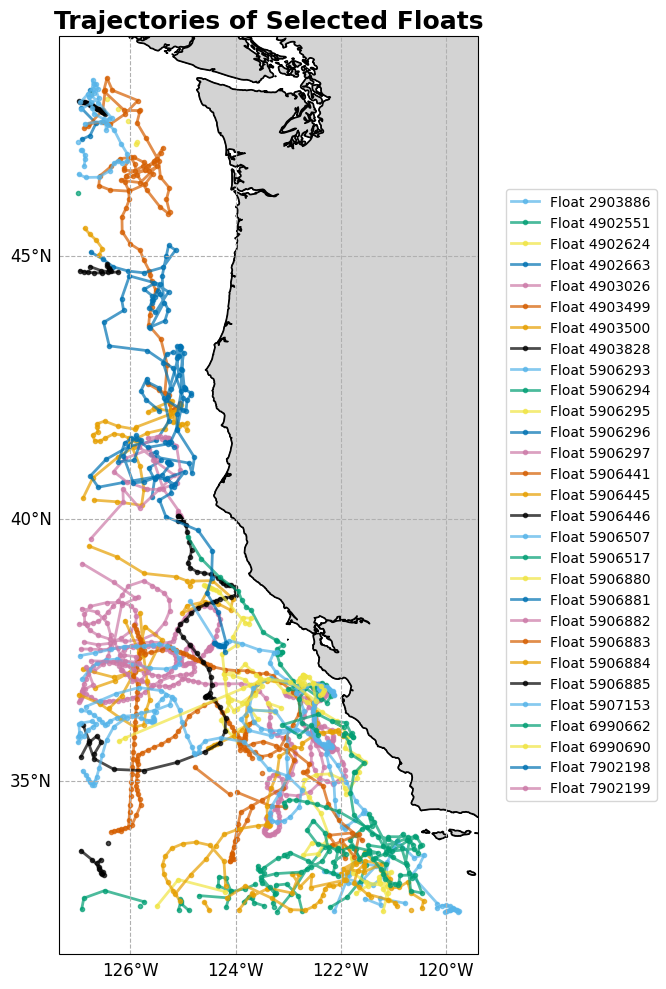

In [11]:
argo.trajectories(profiles_uswc)

In this example we plot the full trajectory of the float we selected along the coast of Hawaii.

Validating passed floats...


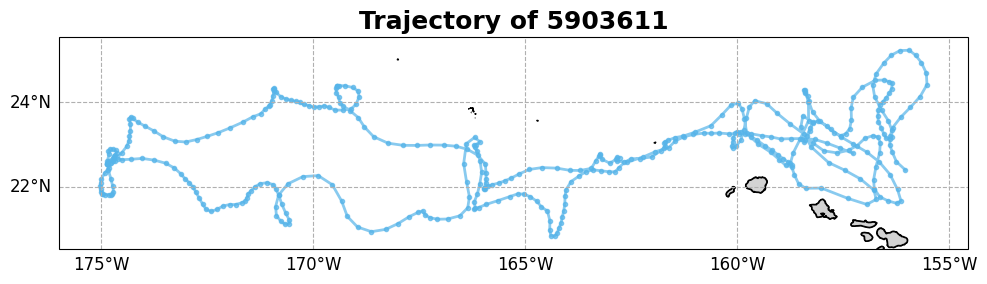

In [12]:
argo.trajectories(profiles_hawaii)

## load_float_data()

load_float_data() is a function to load float profile data into memory from the netCDF files stored on the GDAC. These netCDF files will be downloaded unless the current version of them exists locally already.

To specify what float data to load, the user must pass floats (as either a single ID, a list of IDs, or a dictonary as returned from the select_profiles function to potentially limit the matching profiles) and can optionally pass a list of variables that they would like to be included in the dataframe. For each variable, its associated variables will be loaded as well, i.e., in the TEMP example: TEMP_QC, TEMP_ADJUSTED, TEMP_ADJUSTED_QC, TEMP_ADJUSTED_ERROR

By default, i.e., without specifying any variables, only depth-independent variables (one value per profile) are included: WMOID, CYCLE_NUMBER, DIRECTION, DATE, DATE_QC, LATITUDE, LONGITUDE, and POSITION_QC

In this example we pass the profiles we selected along the west coast and load temperature data for these floats.

In [13]:
uswc_float_data = argo.load_float_data(profiles_uswc, 'TEMP')

Validating passed floats...
Validating passed 'variables'...
2903886_Sprof.nc needs to be downloaded.
Success!
4902551_Sprof.nc needs to be downloaded.
Success!
4902624_Sprof.nc needs to be downloaded.
Success!
4902663_Sprof.nc needs to be downloaded.
Success!
4903026_Sprof.nc needs to be downloaded.
Success!
4903499_Sprof.nc needs to be downloaded.
Success!
4903500_Sprof.nc needs to be downloaded.
Success!
4903828_Sprof.nc needs to be downloaded.
Success!
5906293_Sprof.nc needs to be downloaded.
Success!
5906294_Sprof.nc needs to be downloaded.
Success!
5906295_Sprof.nc needs to be downloaded.
Success!
5906296_Sprof.nc needs to be downloaded.
Success!
5906297_Sprof.nc needs to be downloaded.
Success!
5906441_Sprof.nc needs to be downloaded.
Success!
5906445_Sprof.nc needs to be downloaded.
Success!
5906446_Sprof.nc needs to be downloaded.
Success!
5906507_Sprof.nc needs to be downloaded.
Success!
5906517_Sprof.nc needs to be downloaded.
Success!
5906880_Sprof.nc needs to be downloaded

The data are loaded into a standard pandas dataframe:

In [14]:
uswc_float_data

,WMOID,CYCLE_NUMBER,DIRECTION,DATE,DATE_QC,LATITUDE,LONGITUDE,POSITION_QC,PRES,PRES_QC,PRES_ADJUSTED,PRES_ADJUSTED_QC,PRES_ADJUSTED_ERROR,TEMP,TEMP_QC,TEMP_ADJUSTED,TEMP_ADJUSTED_QC,TEMP_ADJUSTED_ERROR
0,2903886,19,A,2024-02-05 12:56:57.120000,1,32.50632,-119.73697,1,0.440000,1.0,0.440000,1.0,2.400083,14.7310,1.0,14.7310,1.0,0.002236
1,2903886,19,A,2024-02-05 12:56:57.120000,1,32.50632,-119.73697,1,0.560000,1.0,0.560000,1.0,2.400083,14.7310,1.0,14.7310,1.0,0.002236
2,2903886,19,A,2024-02-05 12:56:57.120000,1,32.50632,-119.73697,1,0.680000,1.0,0.680000,1.0,2.400083,14.7310,1.0,14.7310,1.0,0.002236
3,2903886,19,A,2024-02-05 12:56:57.120000,1,32.50632,-119.73697,1,0.760000,1.0,0.760000,1.0,2.400083,14.7300,1.0,14.7300,1.0,0.002236
4,2903886,19,A,2024-02-05 12:56:57.120000,1,32.50632,-119.73697,1,1.000000,1.0,1.000000,1.0,2.400083,14.7300,1.0,14.7300,1.0,0.002236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259029,7902199,52,A,2025-10-12 18:59:35.002017,1,37.173,-126.8383,1,1749.300049,1.0,1749.210083,1.0,2.400000,2.2341,1.0,2.2341,1.0,0.002000
1259030,7902199,52,A,2025-10-12 18:59:35.002017,1,37.173,-126.8383,1,1799.500000,1.0,1799.410034,1.0,2.400000,2.1767,1.0,2.1767,1.0,0.002000
1259031,7902199,52,A,2025-10-12 18:59:35.002017,1,37.173,-126.8383,1,1849.500000,1.0,1849.410034,1.0,2.400000,2.1227,1.0,2.1227,1.0,0.002000
1259032,7902199,52,A,2025-10-12 18:59:35.002017,1,37.173,-126.8383,1,1899.400024,1.0,1899.310059,1.0,2.400000,2.0748,1.0,2.0748,1.0,0.002000


Since the data are now in a pandas dataframe, it is easy to filter them further. For all scientific uses, the "_ADJUSTED" values should be used instead of the raw data.

Here we select adjusted temperature data at a pressure level of 200 dbar:

In [15]:
uswc_temp_200db = uswc_float_data[(abs(uswc_float_data['PRES_ADJUSTED'] - 200) < 0.5) & uswc_float_data['TEMP_ADJUSTED_QC'] == 1]
uswc_temp_200db['TEMP_ADJUSTED']

208        8.893764
209        8.892000
914        8.743199
915        8.730000
1601       8.691958
             ...   
1256566    7.291000
1257082    7.403000
1257599    7.815000
1258111    7.549000
1258623    7.633000
Name: TEMP_ADJUSTED, Length: 2072, dtype: float32

## Map plots at specified depths

It is now easy to create a map of temperature at this depth level:

/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


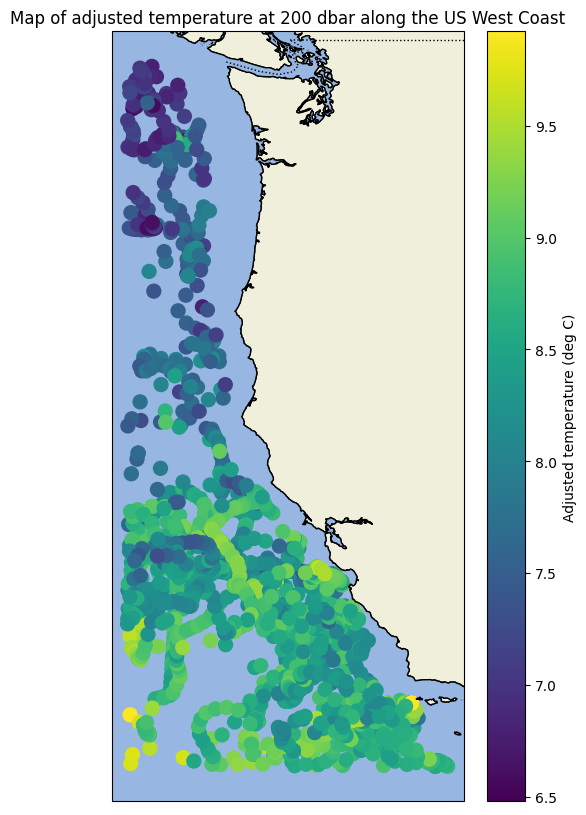

In [16]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.cm as cm
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(6, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Adding features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

sc = ax.scatter(uswc_temp_200db['LONGITUDE'], uswc_temp_200db['LATITUDE'],
           c=uswc_temp_200db['TEMP_ADJUSTED'], cmap='viridis', s=100)

# Colorbar
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Adjusted temperature (deg C)')

plt.title('Map of adjusted temperature at 200 dbar along the US West Coast');
plt.show()

In the next example we load the float data for the Hawaii biogeochemical float we specified earlier.

In [17]:
hawaii_float_data = argo.load_float_data(profiles_hawaii, ['TEMP','DOXY'])
hawaii_float_data

Validating passed floats...
Validating passed 'variables'...
5903611_Sprof.nc needs to be downloaded.
Success!
Loading float data...
Loading Float data from float 5903611 with 426 profiles...
Dropping rows where no measurements were taken for 5903611...


,WMOID,CYCLE_NUMBER,DIRECTION,DATE,DATE_QC,LATITUDE,LONGITUDE,POSITION_QC,PRES,PRES_QC,...,TEMP,TEMP_QC,TEMP_ADJUSTED,TEMP_ADJUSTED_QC,TEMP_ADJUSTED_ERROR,DOXY,DOXY_QC,DOXY_ADJUSTED,DOXY_ADJUSTED_QC,DOXY_ADJUSTED_ERROR
0,5903611,1,A,2011-11-03 05:06:32.000547,1,22.687,-157.066,1,3.000000,1.0,...,25.6150,4.0,NaN,4.0,NaN,NaN,0.0,NaN,0.0,NaN
1,5903611,1,A,2011-11-03 05:06:32.000547,1,22.687,-157.066,1,4.000000,1.0,...,25.6150,1.0,25.6150,1.0,0.002,NaN,0.0,NaN,0.0,NaN
2,5903611,1,A,2011-11-03 05:06:32.000547,1,22.687,-157.066,1,6.000000,1.0,...,25.6150,1.0,25.6150,1.0,0.002,NaN,0.0,NaN,0.0,NaN
3,5903611,1,A,2011-11-03 05:06:32.000547,1,22.687,-157.066,1,7.500000,1.0,...,25.6150,8.0,25.6150,8.0,0.002,190.304855,3.0,205.643417,1.0,4.978571
4,5903611,1,A,2011-11-03 05:06:32.000547,1,22.687,-157.066,1,8.000000,1.0,...,25.6150,1.0,25.6150,1.0,0.002,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233288,5903611,426,A,2017-11-09 00:51:20.000074,1,22.410,-156.028,1,974.000000,1.0,...,4.0310,1.0,4.0310,1.0,0.002,NaN,0.0,NaN,0.0,NaN
233289,5903611,426,A,2017-11-09 00:51:20.000074,1,22.410,-156.028,1,976.000000,1.0,...,4.0280,1.0,4.0280,1.0,0.002,NaN,0.0,NaN,0.0,NaN
233290,5903611,426,A,2017-11-09 00:51:20.000074,1,22.410,-156.028,1,978.000000,1.0,...,4.0260,1.0,4.0260,1.0,0.002,NaN,0.0,NaN,0.0,NaN
233291,5903611,426,A,2017-11-09 00:51:20.000074,1,22.410,-156.028,1,979.099976,1.0,...,3.9860,1.0,3.9860,1.0,0.002,NaN,0.0,NaN,0.0,NaN


Now we select all rows where TEMP_ADJUSTED and DOXY_ADJUSTED have good data, indicated by a value of 1 in their respetive _QC columns:

In [18]:
hawaii_good_T_O2 = hawaii_float_data[(hawaii_float_data['TEMP_ADJUSTED_QC'] == 1) & (hawaii_float_data['DOXY_ADJUSTED_QC'] == 1)]
hawaii_good_T_O2.head()

,WMOID,CYCLE_NUMBER,DIRECTION,DATE,DATE_QC,LATITUDE,LONGITUDE,POSITION_QC,PRES,PRES_QC,...,TEMP,TEMP_QC,TEMP_ADJUSTED,TEMP_ADJUSTED_QC,TEMP_ADJUSTED_ERROR,DOXY,DOXY_QC,DOXY_ADJUSTED,DOXY_ADJUSTED_QC,DOXY_ADJUSTED_ERROR
1043,5903611,2,A,2011-11-08 08:39:26.000916,1,22.799,-157.265,1,999.400024,1.0,...,3.879000,1.0,3.879000,1.0,0.002,36.457764,3.0,39.396263,1.0,7.526958
1066,5903611,3,A,2011-11-13 12:33:08.001334,1,22.922,-157.561,1,36.000000,1.0,...,25.219000,1.0,25.219000,1.0,0.002,190.475555,3.0,205.827881,1.0,5.006907
1086,5903611,3,A,2011-11-13 12:33:08.001334,1,22.922,-157.561,1,66.000000,1.0,...,25.226999,1.0,25.226999,1.0,0.002,190.094467,3.0,205.416092,1.0,5.006284
1174,5903611,3,A,2011-11-13 12:33:08.001334,1,22.922,-157.561,1,208.000000,1.0,...,18.143999,1.0,18.143999,1.0,0.002,181.454758,3.0,196.080002,1.0,5.618274
1588,5903611,3,A,2011-11-13 12:33:08.001334,1,22.922,-157.561,1,999.599976,1.0,...,3.853000,1.0,3.853000,1.0,0.002,37.446819,3.0,40.465034,1.0,7.531212


## Correlation plot between two variables

Now we create a T-O2 plot from these data:

In [ ]:
fig, ax = plt.subplots()

ax.scatter(hawaii_good_T_O2['TEMP_ADJUSTED'], hawaii_good_T_O2['DOXY_ADJUSTED'], s=3, c='k')

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))
plt.xlabel('Temperature (deg C)')
plt.ylabel('Dissolved Oxygen (umol/kg)')
plt.show()

## sections()

sections() is a function to create section plots along the float trajectory for the passed variables using data from the passed float_data dataframe.

It uses the return value from the load_float_data() function as first argument.

In this example produces temperature section plots for the data from the the west coast floats that we selected and loaded into memory previousy. A separate plot is created for each one of the floats.

In [ ]:
argo.sections(uswc_float_data, 'TEMP_ADJUSTED')

The next example creates section plots for adjusted data of dissolved oxygen and temperatue for the data from the Hawaii float:

In [ ]:
argo.sections(hawaii_float_data, ['DOXY_ADJUSTED', 'TEMP_ADJUSTED'])